#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

!pip install ultralytics==8.0.196
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

# Download Correctly Formatted Custom Dataset

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [2]:
#follow the link below to get your download code from from Roboflow
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

rf = Roboflow(api_key="VqrByT7v0fTZoi6RoZV5")
project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coral-Life-Forms-Detection-3 in yolov8:: 100%|██████████| 1726/1726 [00:00<00:00, 2248.05it/s]


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

# Train Custom YOLOv8 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [3]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
!yolo task=detect mode=train model=yolov8n.pt data=/content/Coral-Life-Forms-Detection-3/data.yaml epochs=100 imgsz=416 batch=16 plots=True

100% 6.23M/6.23M [00:00<00:00, 114MB/s]
New https://pypi.org/project/ultralytics/8.1.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Coral-Life-Forms-Detection-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

# Evaluate Custom YOLOv8 Detector Performance

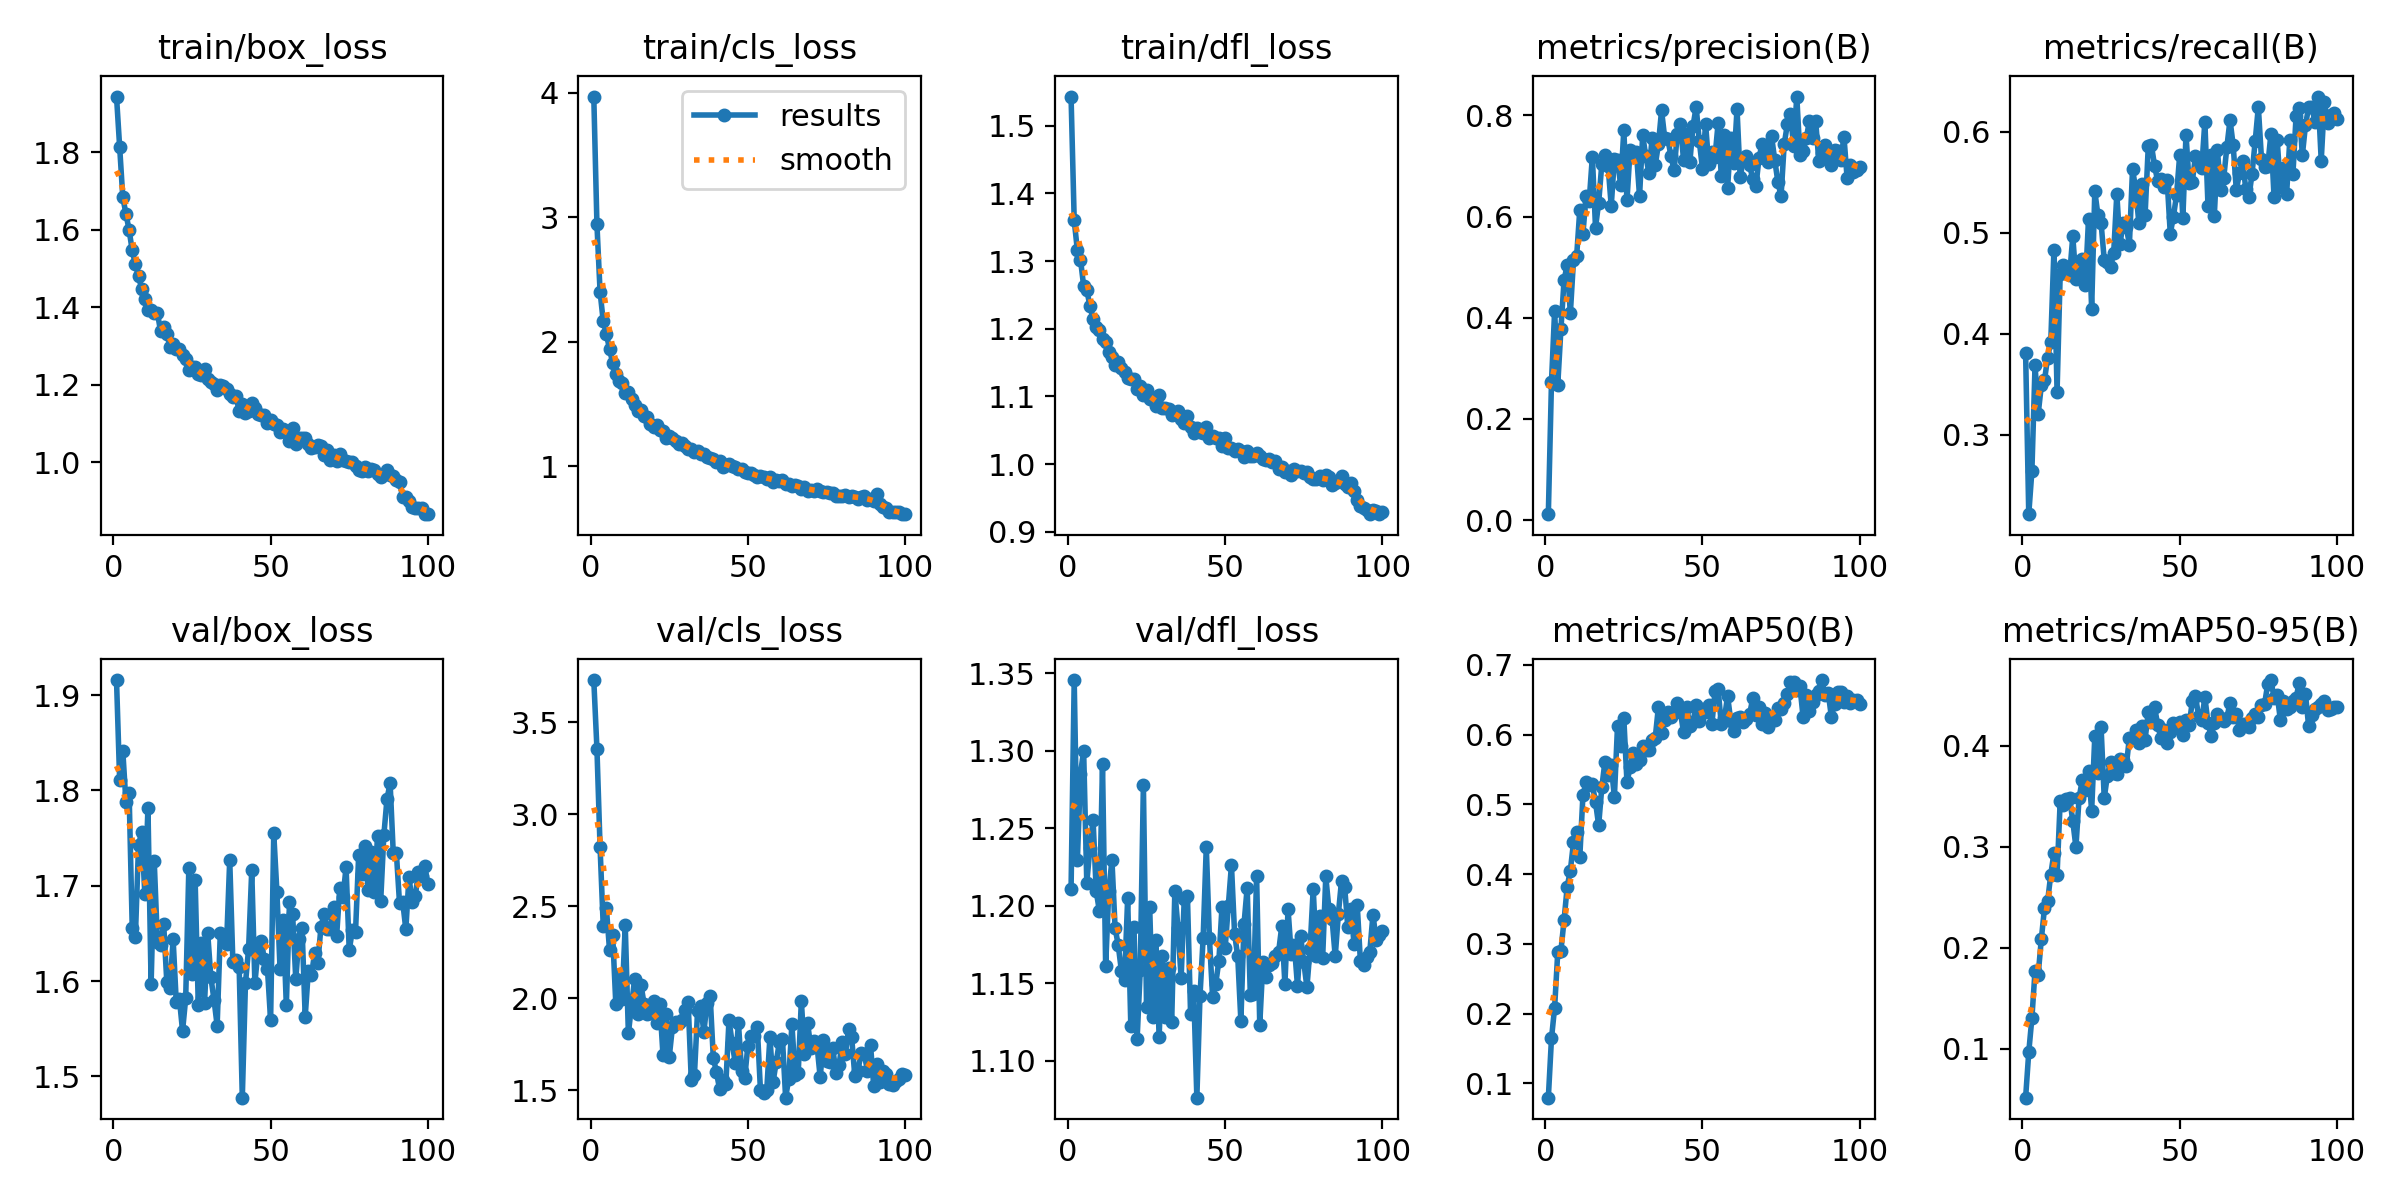

In [4]:
Image(filename=f'/content/runs/detect/train/results.png',width=600)

### Visualize Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.


GROUND TRUTH TRAINING DATA:


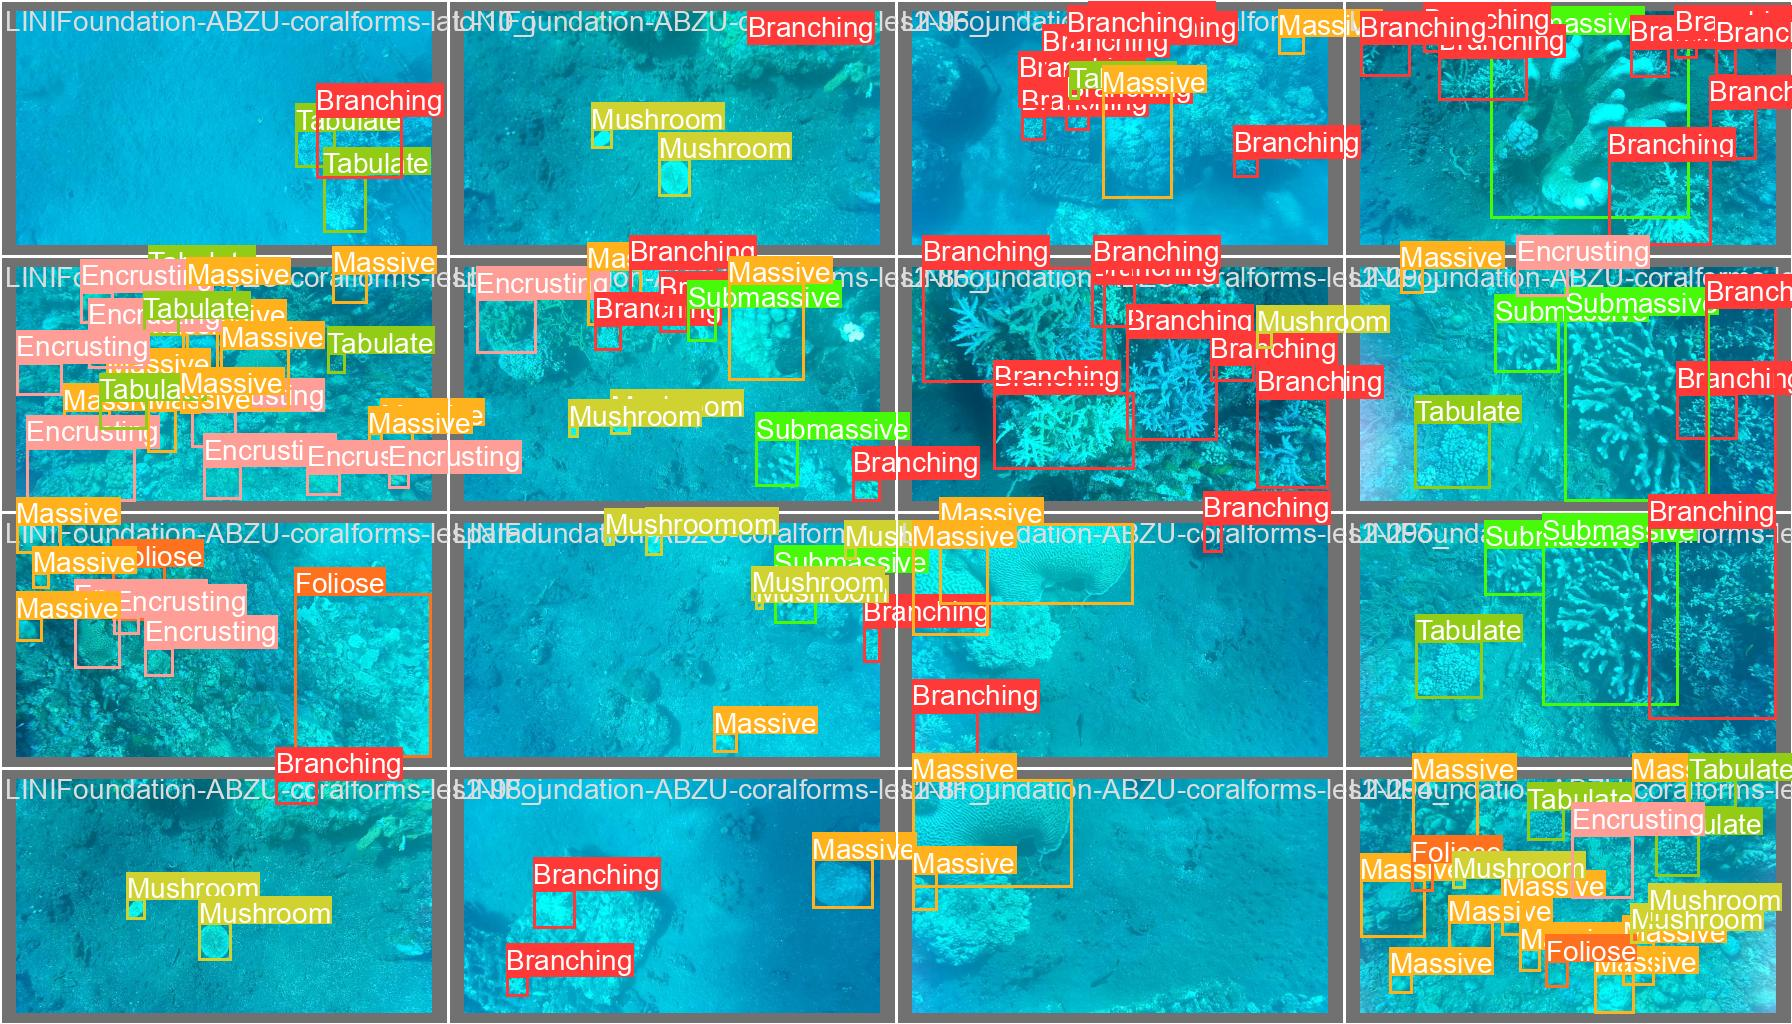

In [5]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


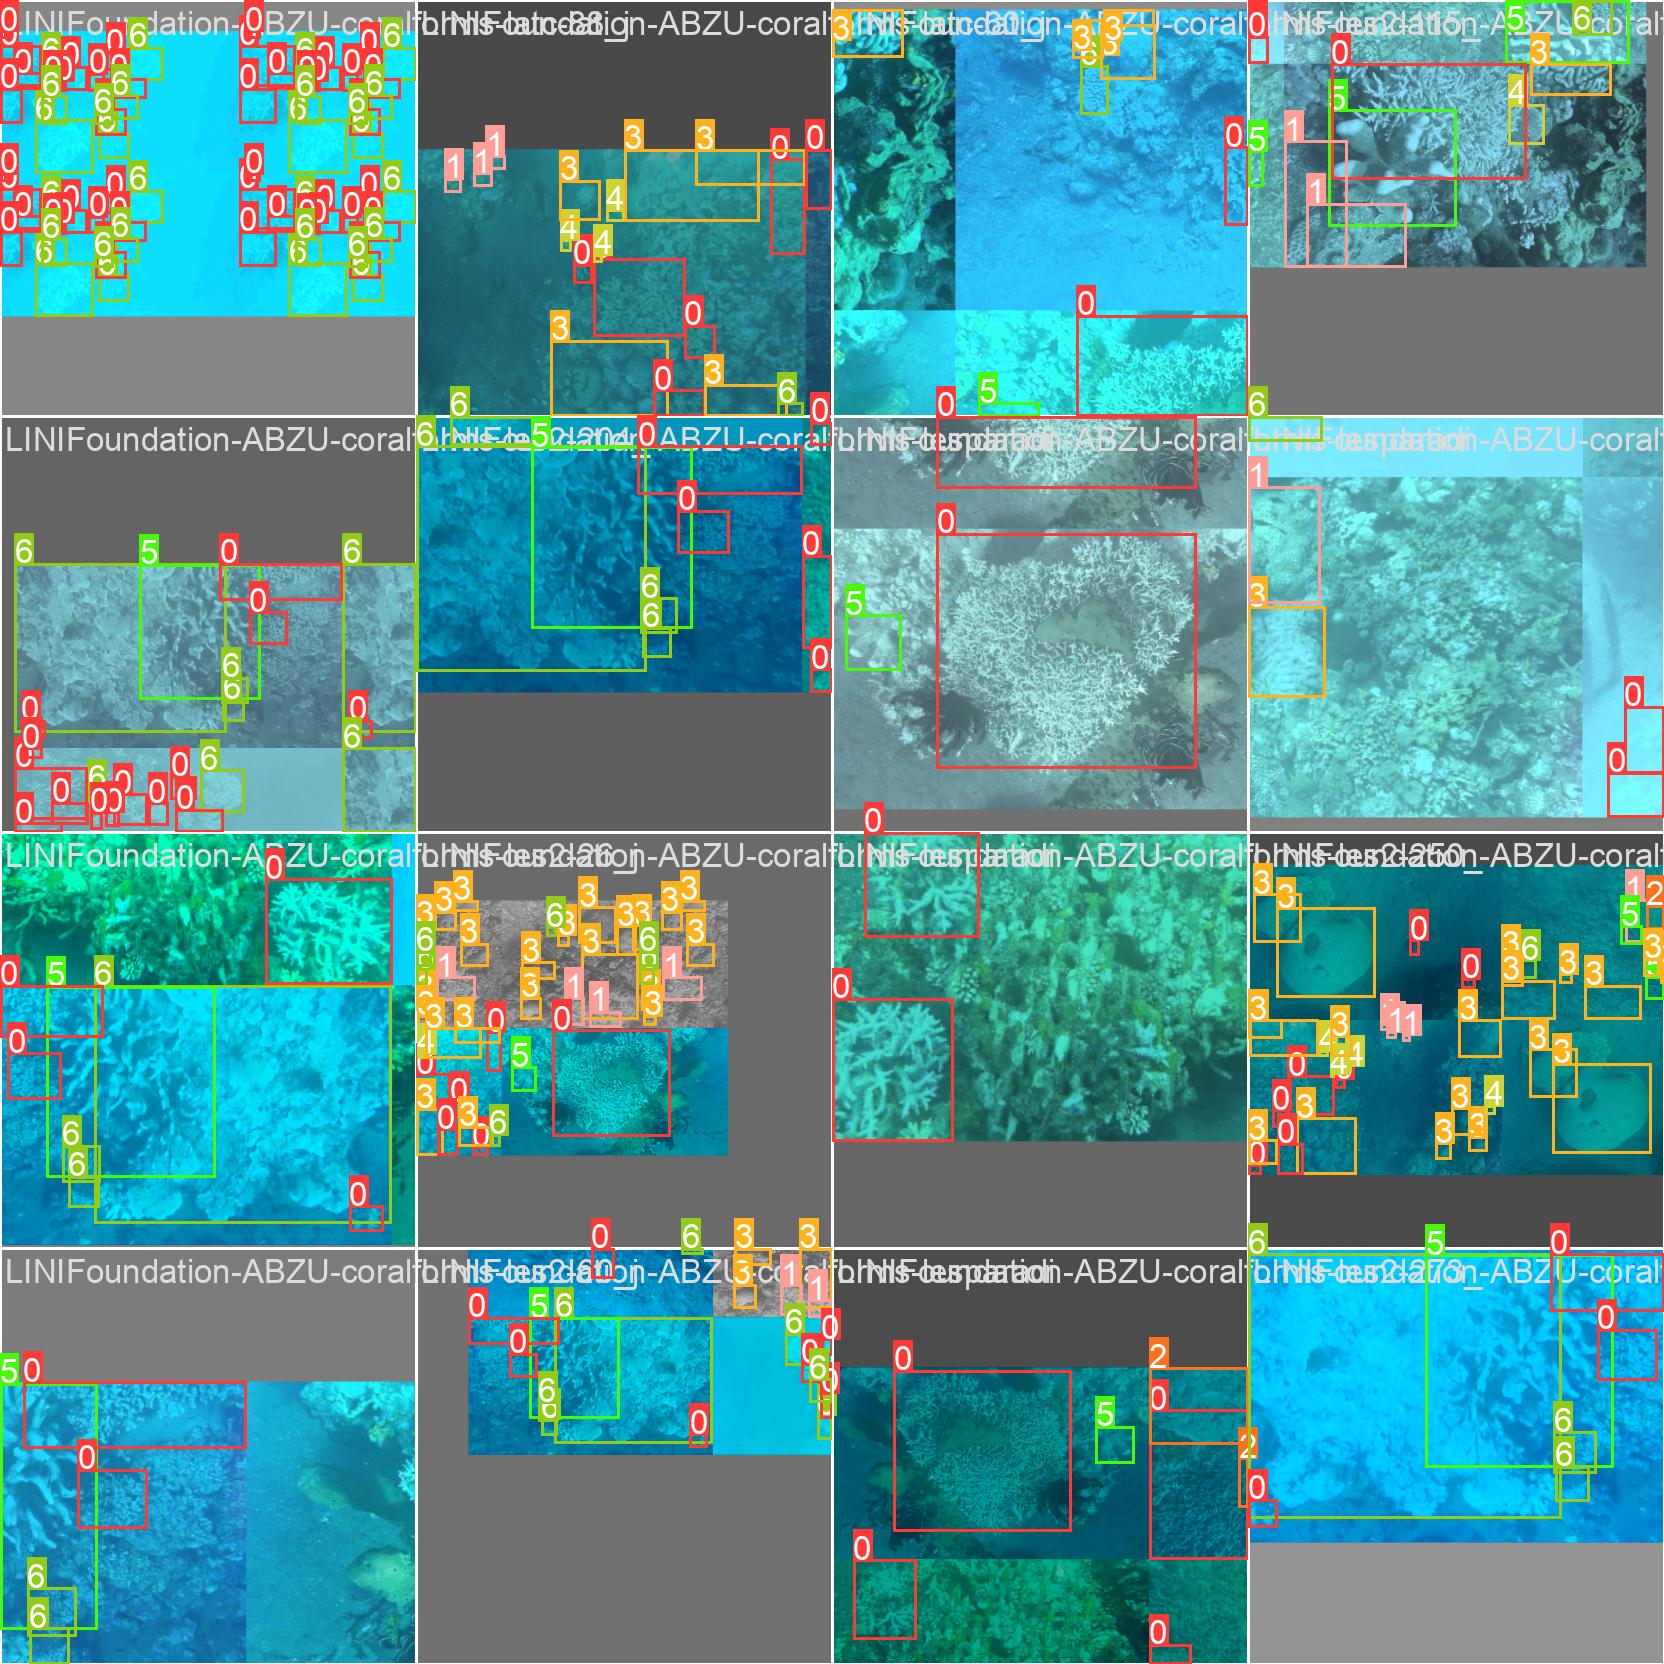

In [6]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/runs/detect/train/train_batch0.jpg', width=900)

CONFUSION MATRIX:


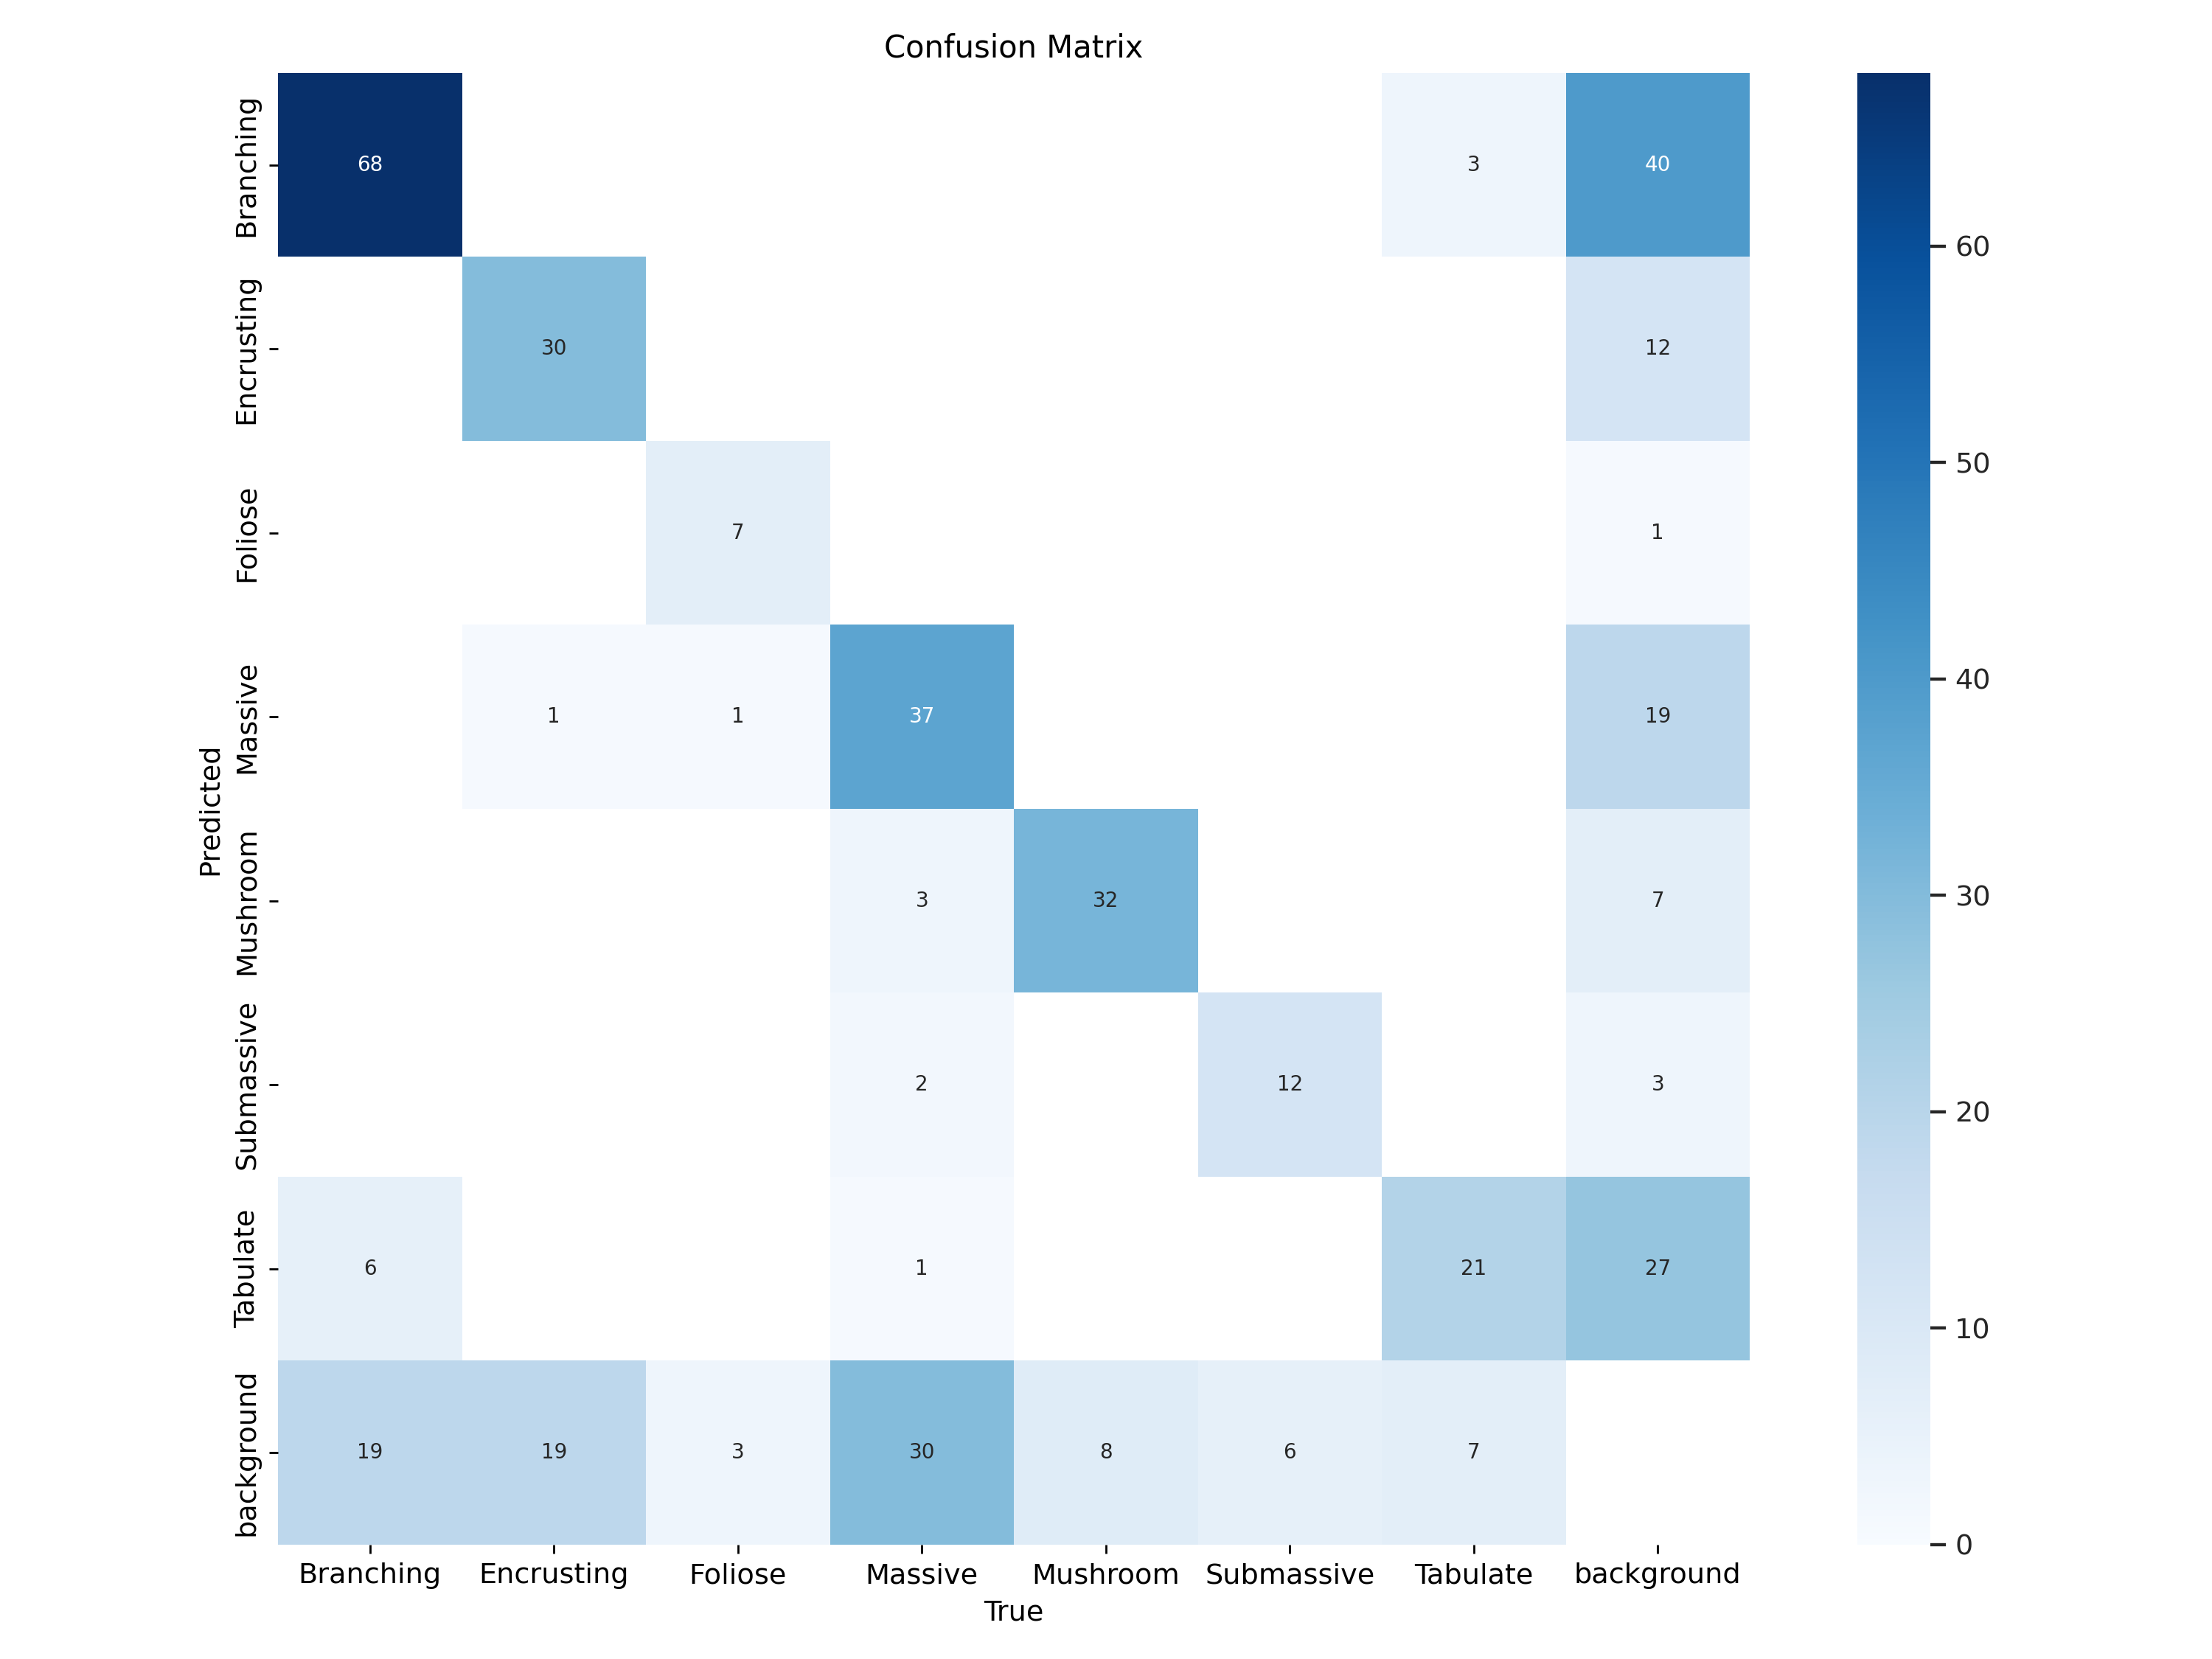

In [7]:
# print out the confusion matrix
print("CONFUSION MATRIX:")
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=900)

Validation Predict:


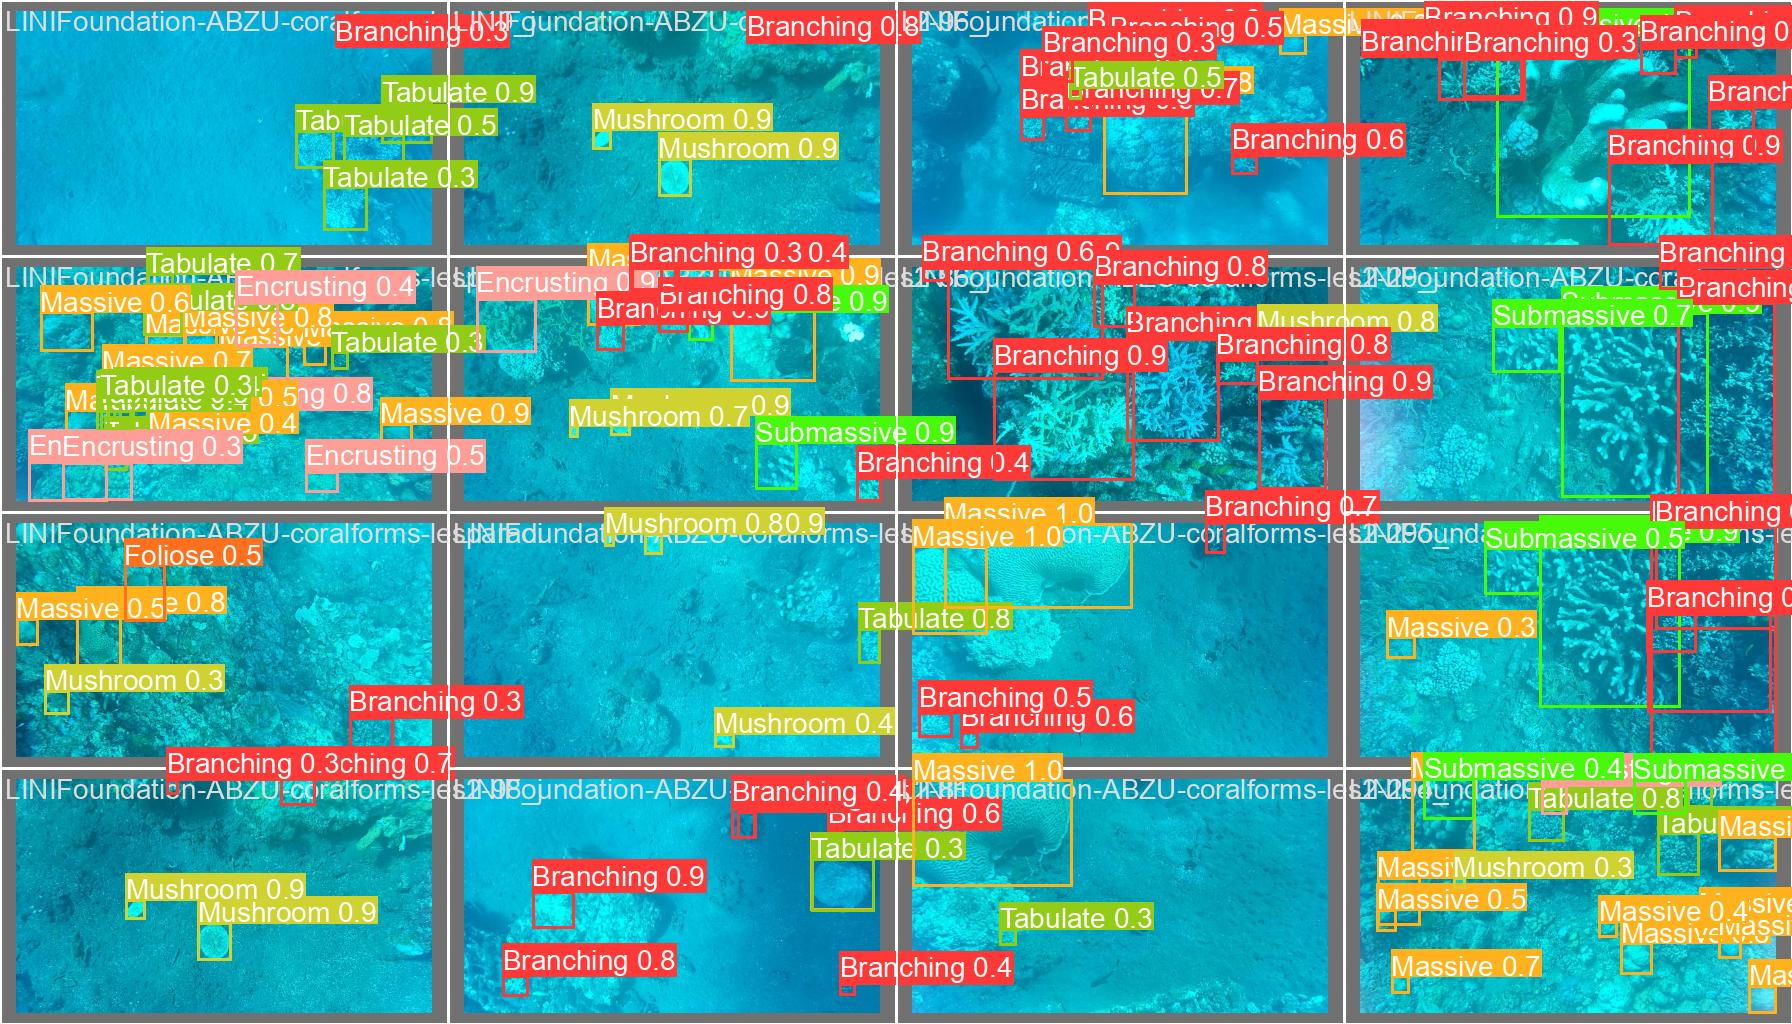

In [9]:
# print out the prediction
print("Validation Predict:")
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [10]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
#validation
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Coral-Life-Forms-Detection-3/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Coral-Life-Forms-Detection-3/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.38s/it]
                   all         33        316       0.74      0.597      0.676      0.465
             Branching         33         93      0.716      0.634      0.732      0.485
            Encrusting         33         50      0.765       0.54      0.627      0.415
               Foliose         33         11      0.877      0.651      0.766      0.566
               Massive         33         73      0.721      0.479      0.592       0.36
              Mushroom         33         40      0.844       0.75      0.848      0.603
            Submassive         33   

In [11]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')


In [12]:
model.predict(source='/content/Coral-Life-Forms-Detection-3/valid/images/LINIFoundation-ABZU-coralforms-latc-10_jpg.rf.579f3238495ecd7156a412b48415c24d.jpg',imgsz=640,conf=0.6,save=True)


image 1/1 /content/Coral-Life-Forms-Detection-3/valid/images/LINIFoundation-ABZU-coralforms-latc-10_jpg.rf.579f3238495ecd7156a412b48415c24d.jpg: 384x640 1 Branching, 2 Tabulates, 113.1ms
Speed: 2.6ms preprocess, 113.1ms inference, 515.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Branching', 1: 'Encrusting', 2: 'Foliose', 3: 'Massive', 4: 'Mushroom', 5: 'Submassive', 6: 'Tabulate'}
 orig_img: array([[[225, 182,   9],
         [224, 181,   8],
         [222, 179,   6],
         ...,
         [223, 180,   0],
         [223, 180,   1],
         [223, 180,   1]],
 
        [[221, 178,   5],
         [220, 177,   4],
         [219, 176,   3],
         ...,
         [223, 180,   0],
         [223, 180,   1],
         [223, 180,   1]],
 
        [[216, 173,   0],
         [216, 173,   0],
         [216, 173,   0],
         ...,
         [223, 180,   1],
         [223, 180,   1],
         [223, 180,   1]],
 
        ...,
 
        [[204, 156,   0],
         [205, 157,   0],
         [208, 158,   0],
         ...,
         [220, 173,   0],
         [219, 172,   0],
         [219, 172,   0]],
 
        [[207, 159,   1],


Test Predict:


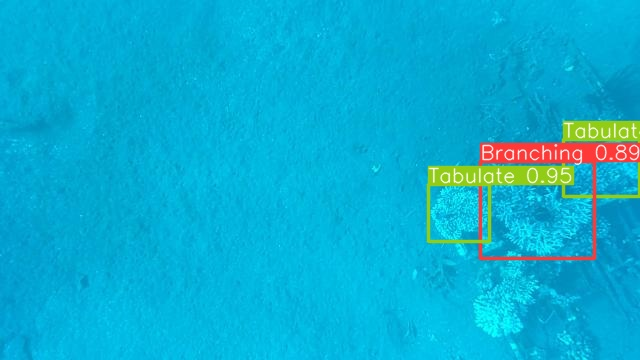

In [13]:
# print out the test prediction
print("Test Predict:")
Image(filename='/content/runs/detect/predict/LINIFoundation-ABZU-coralforms-latc-10_jpg.rf.579f3238495ecd7156a412b48415c24d.jpg', width=900)


image 1/1 /content/Coral-Life-Forms-Detection-3/valid/images/LINIFoundation-ABZU-coralforms-latc-87_jpg.rf.1558c7e04c82558e3edd811cfdd7f5d2.jpg: 384x640 4 Branchings, 6 Tabulates, 7.2ms
Speed: 3.3ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Test Predict:


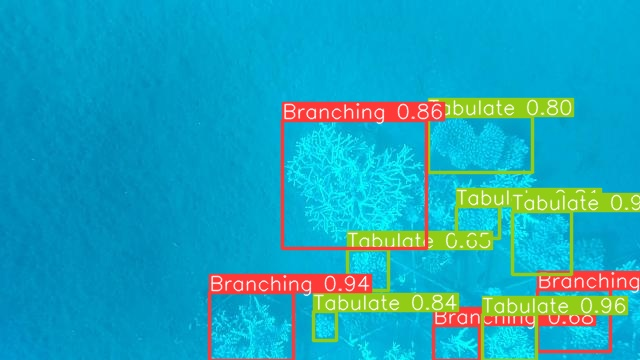

In [14]:
model.predict(source='/content/Coral-Life-Forms-Detection-3/valid/images/LINIFoundation-ABZU-coralforms-latc-87_jpg.rf.1558c7e04c82558e3edd811cfdd7f5d2.jpg',imgsz=640,conf=0.6,save=True)
print("Test Predict:")
Image(filename='/content/runs/detect/predict/LINIFoundation-ABZU-coralforms-latc-87_jpg.rf.1558c7e04c82558e3edd811cfdd7f5d2.jpg', width=900)

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere